<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/matt_paul_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
library(tidyverse)
df <- read_csv("mlb_teams.csv") %>% filter(world_series_winner == 'Y')

Rows: 2784 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): league_id, division_id, division_winner, wild_card_winner, league_...
dbl (33): year, rank, games_played, home_games, wins, losses, runs_scored, a...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
df %>% colnames

[1] "year"                   "league_id"              "division_id"           
 [4] "rank"                   "games_played"           "home_games"            
 [7] "wins"                   "losses"                 "division_winner"       
[10] "wild_card_winner"       "league_winner"          "world_series_winner"   
[13] "runs_scored"            "at_bats"                "hits"                  
[16] "doubles"                "triples"                "homeruns"              
[19] "walks"                  "strikeouts_by_batters"  "stolen_bases"          
[22] "caught_stealing"        "batters_hit_by_pitch"   "sacrifice_flies"       
[25] "opponents_runs_scored"  "earned_runs_allowed"    "earned_run_average"    
[28] "complete_games"         "shutouts"               "saves"                 
[31] "outs_pitches"           "hits_allowed"           "homeruns_allowed"      
[34] "walks_allowed"          "strikeouts_by_pitchers" "errors"                
[37] "double_plays"           "fielding_percentage"    "team_name"             
[40] "ball_park"              "home_attendance"

In [15]:
df %>% dim

[1] 120  41

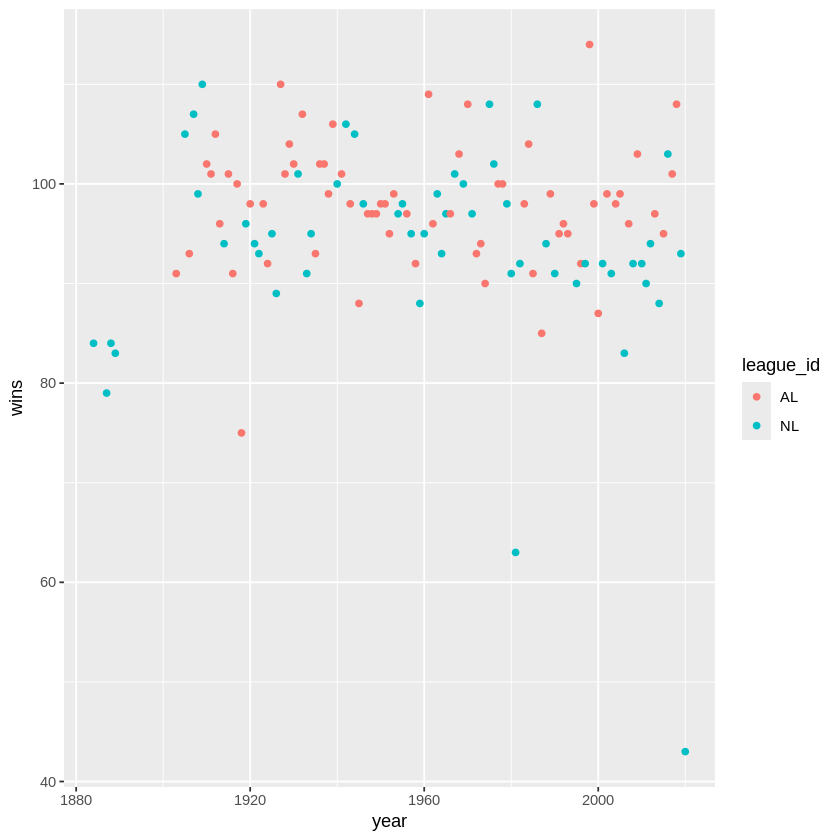

In [16]:
df %>% ggplot(aes(x=year, y=wins, color=league_id)) + geom_point()

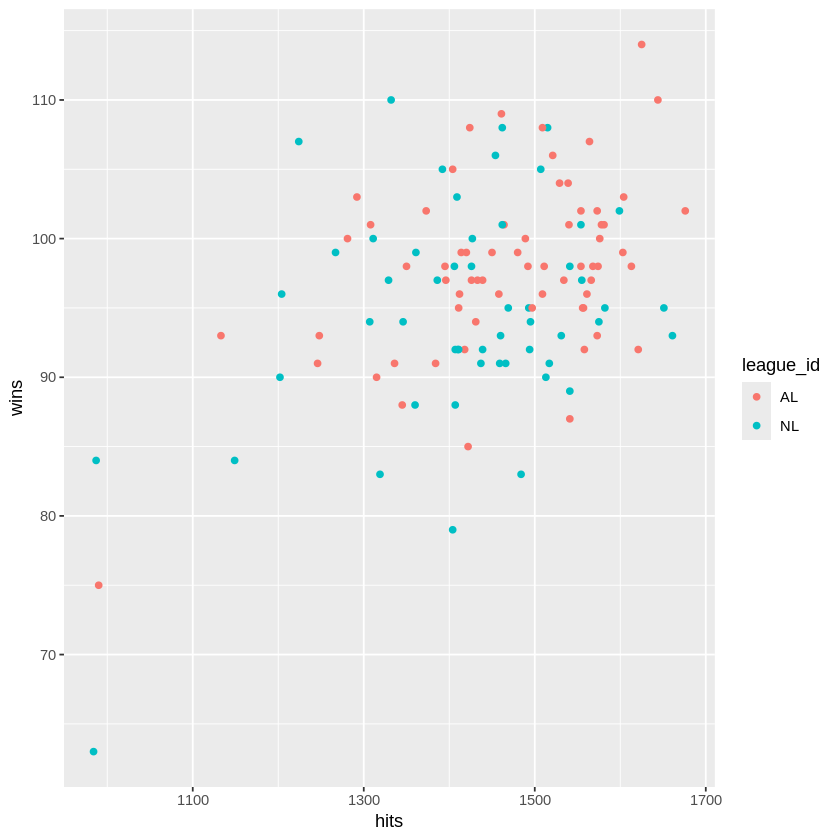

In [18]:
df %>% filter(wins > 50) %>% ggplot(aes(x=hits, y=wins, color=league_id)) + geom_point()

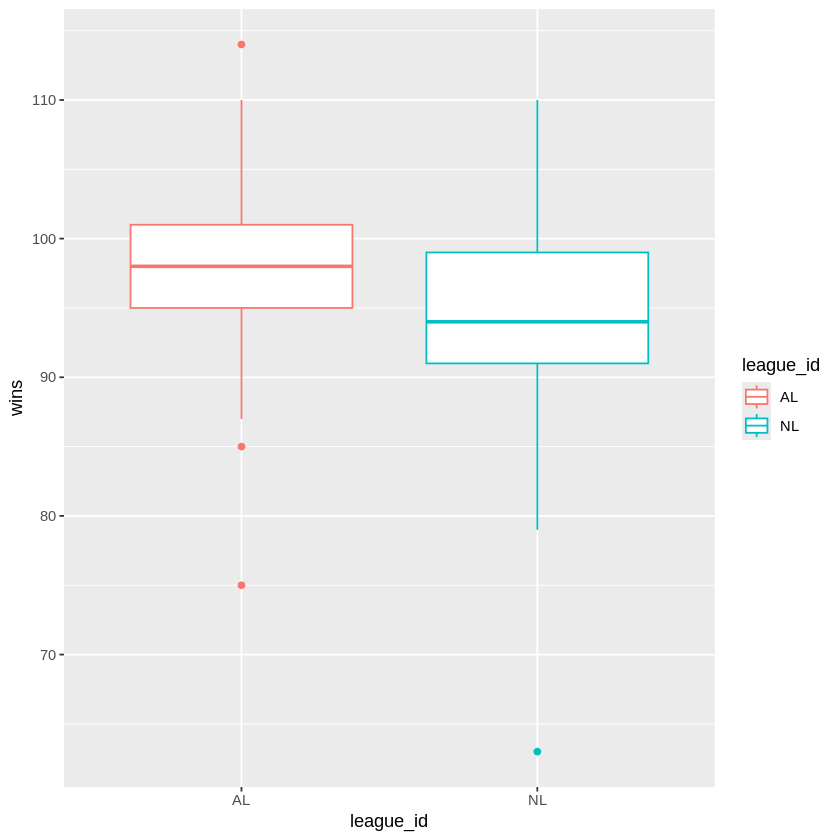

In [19]:
df %>% filter(wins > 50) %>% ggplot(aes(x=league_id, y=wins, color=league_id)) + geom_boxplot()

$$
\widehat{wins} = \beta_0 + \beta_1 Hits + \beta_2 ERA + \beta_3 League + \beta_4 Runs Scored + \beta_5 Errors
$$

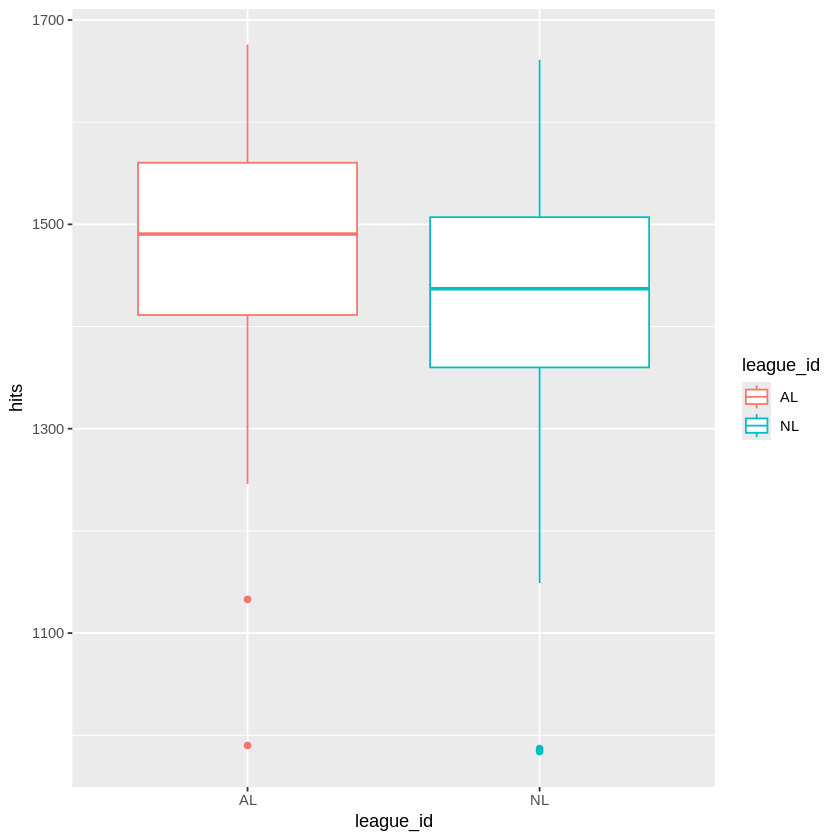

In [37]:
df %>% filter(wins > 50) %>% ggplot(aes(x=league_id, y=hits, color=league_id)) + geom_boxplot()

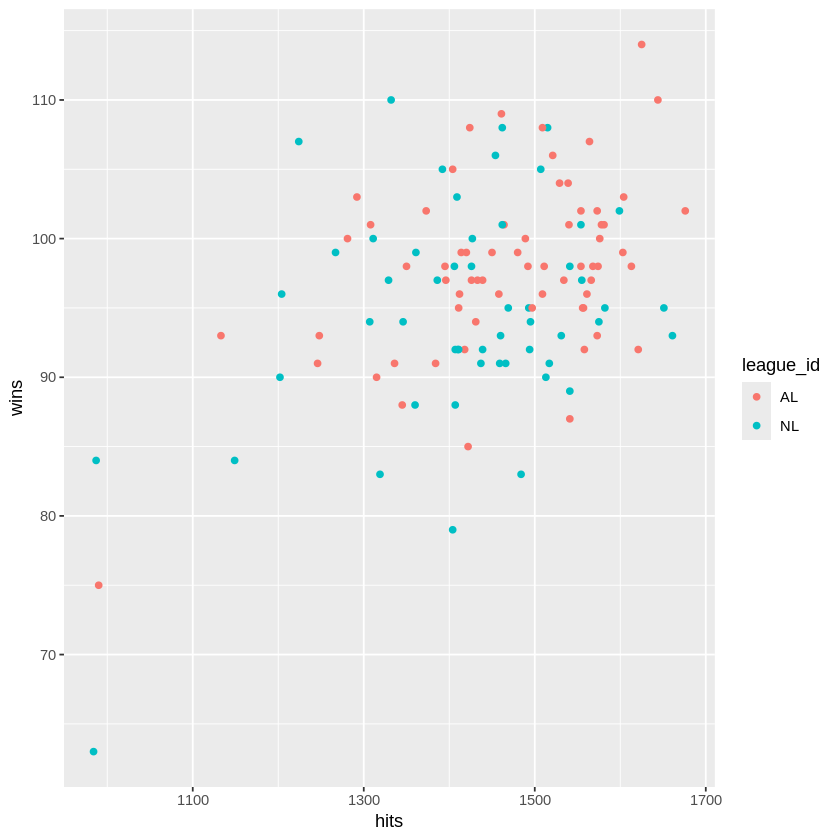

In [38]:
df %>% filter(wins > 50) %>% ggplot(aes(x=hits, y=wins, color=league_id)) + geom_point()

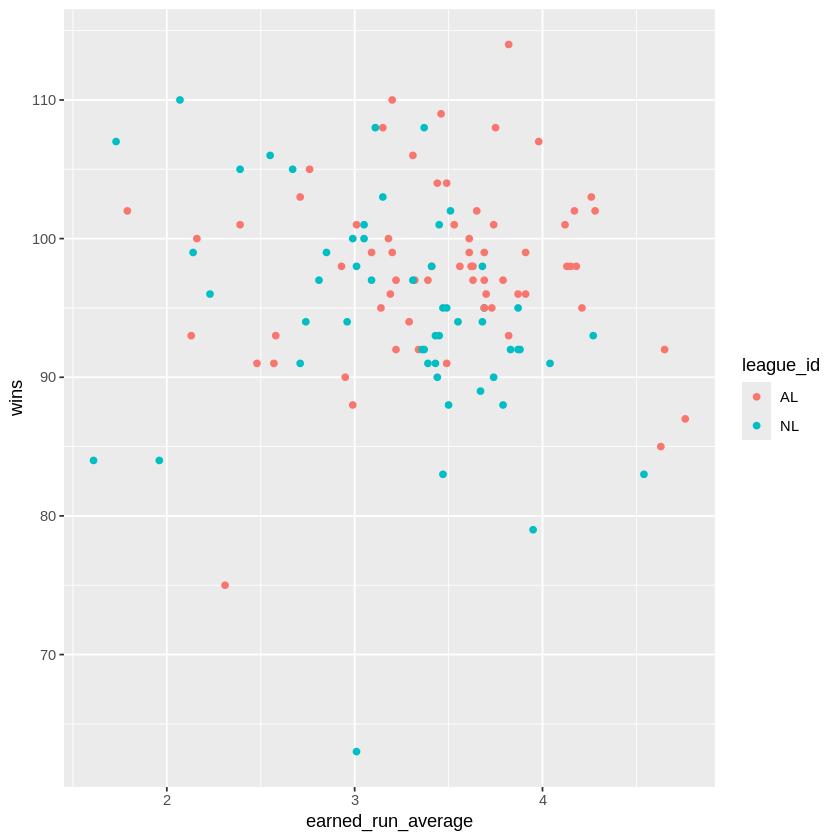

In [39]:
df %>% filter(wins > 50) %>% ggplot(aes(x=earned_run_average, y=wins, color=league_id)) + geom_point()

In [34]:
model1 <- lm(wins ~ hits + earned_run_average + league_id + runs_scored + errors, data=df)
summary(model1)


Call:
lm(formula = wins ~ hits + earned_run_average + league_id + runs_scored + 
    errors, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.020  -3.290   0.214   2.944   9.372 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         67.334567   4.595912  14.651  < 2e-16 ***
hits                 0.032093   0.004699   6.830 4.37e-10 ***
earned_run_average -14.736827   1.119686 -13.162  < 2e-16 ***
league_idNL         -0.637978   0.881298  -0.724    0.471    
runs_scored          0.052332   0.007771   6.734 7.01e-10 ***
errors              -0.055518   0.008573  -6.476 2.48e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.399 on 114 degrees of freedom
Multiple R-squared:  0.7592,	Adjusted R-squared:  0.7486 
F-statistic: 71.89 on 5 and 114 DF,  p-value: < 2.2e-16


In [24]:
model2 <- lm(wins ~ hits + earned_run_average + runs_scored + errors, data=df)
summary(model2)


Call:
lm(formula = wins ~ hits + earned_run_average + runs_scored + 
    errors, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2559  -3.3303   0.1313   2.7432   9.5459 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         67.025777   4.566595  14.677  < 2e-16 ***
hits                 0.031579   0.004635   6.813 4.63e-10 ***
earned_run_average -14.875877   1.100802 -13.514  < 2e-16 ***
runs_scored          0.054219   0.007306   7.421 2.17e-11 ***
errors              -0.057068   0.008285  -6.889 3.18e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.39 on 115 degrees of freedom
Multiple R-squared:  0.7581,	Adjusted R-squared:  0.7497 
F-statistic:  90.1 on 4 and 115 DF,  p-value: < 2.2e-16


In [26]:
model3 <- lm(wins ~ earned_run_average + runs_scored + errors, data=df)
summary(model3)


Call:
lm(formula = wins ~ earned_run_average + runs_scored + errors, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2677  -2.6293   0.3832   3.4575   9.0686 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         89.615763   3.704066  24.194  < 2e-16 ***
earned_run_average -15.456487   1.294640 -11.939  < 2e-16 ***
runs_scored          0.089901   0.006009  14.961  < 2e-16 ***
errors              -0.076121   0.009199  -8.275 2.47e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.179 on 116 degrees of freedom
Multiple R-squared:  0.6605,	Adjusted R-squared:  0.6517 
F-statistic: 75.21 on 3 and 116 DF,  p-value: < 2.2e-16


In [25]:
cor(df$hits, df$runs_scored)

[1] 0.8028756

In [28]:
model4 <- lm(wins ~ earned_run_average + runs_scored, data=df)
summary(model4)


Call:
lm(formula = wins ~ earned_run_average + runs_scored, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.9789  -1.9275   0.6677   3.0957  10.3695 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        74.100994   4.011201  18.474   <2e-16 ***
earned_run_average -8.637799   1.253826  -6.889    3e-10 ***
runs_scored         0.065800   0.006599   9.970   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.503 on 117 degrees of freedom
Multiple R-squared:   0.46,	Adjusted R-squared:  0.4508 
F-statistic: 49.84 on 2 and 117 DF,  p-value: < 2.2e-16


In [30]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(stargazer)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [35]:
# Use stargazer to compare them
stargazer(model1, model2, model3, model4,
          type = "text",    # use "html" or "latex" if preferred
          title = "Model Comparison",
          align = TRUE,
          no.space = TRUE)


Model Comparison
                                                          Dependent variable:                                      
                    -----------------------------------------------------------------------------------------------
                                                                 wins                                              
                              (1)                     (2)                     (3)                     (4)          
-------------------------------------------------------------------------------------------------------------------
hits                       0.032***                0.032***                                                        
                            (0.005)                 (0.005)                                                        
earned_run_average        -14.737***              -14.876***              -15.456***               -8.638***       
                            (1.120)                 (1

In [36]:
# Use stargazer to compare them
stargazer(model1, model2, model3, model4,
          type = "latex",    # use "html" or "latex" if preferred
          title = "Model Comparison",
          align = TRUE,
          no.space = TRUE)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Wed, Apr 02, 2025 - 08:02:39 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Model Comparison} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & \multicolumn{4}{c}{wins} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)} & \multicolumn{1}{c}{(4)}\\ 
\hline \\[-1.8ex] 
 hits & 0.032^{***} & 0.032^{***} &  &  \\ 
  & (0.005) & (0.005) &  &  \\ 
  earned\_run\_average & -14.737^{***} & -14.876^{***} & -15.456^{***} & -8.638^{***} \\ 
  & (1.120) & (1.101) & (1.295) & (1.254) \\ 
  league\_idNL & -0.638 &  &  &  \\ 
  & (0.881) &  &  &  \\ 
  runs\_scored & 0.052^{***} & 0.054^{***} & 0.090^{***} & 0.066^{***} \\ 
  & 